In [1]:
import time

from src.environments import GridEnvironment
from src.agents import RandomAgent
from src.learners import n_step_sarsa_learning_loop
from src.utils import verification_loop, multi_episodes_verification_loop, main_plot, extra_plots

In [5]:
env = GridEnvironment(max_timesteps=20)
agent = RandomAgent(env)

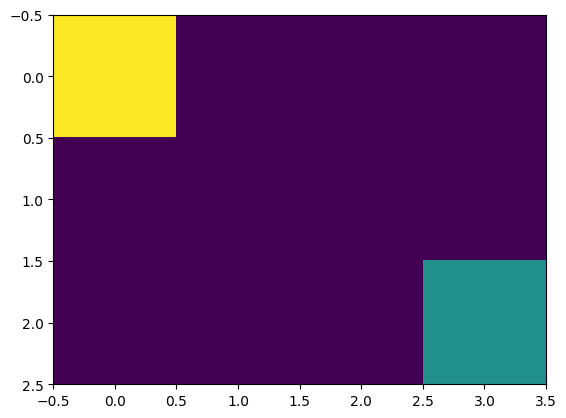

In [6]:
env.render()

Agent opt to take the following action: Right
New Observation: [[0.  1.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.5]]; Immediate Reward: 0, Termination Status: False, Termination Message: Not Terminated
**************
Agent opt to take the following action: Left
New Observation: [[1.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.5]]; Immediate Reward: 0, Termination Status: False, Termination Message: Not Terminated
**************
Agent opt to take the following action: Up
New Observation: [[1.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.5]]; Immediate Reward: -1, Termination Status: False, Termination Message: Not Terminated
**************
Agent opt to take the following action: Left
New Observation: [[1.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.5]]; Immediate Reward: -1, Termination Status: False, Termination Message: Not Terminated
**************
Agent opt to take the following action: Right
New Observation: [[0.  1.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.5]

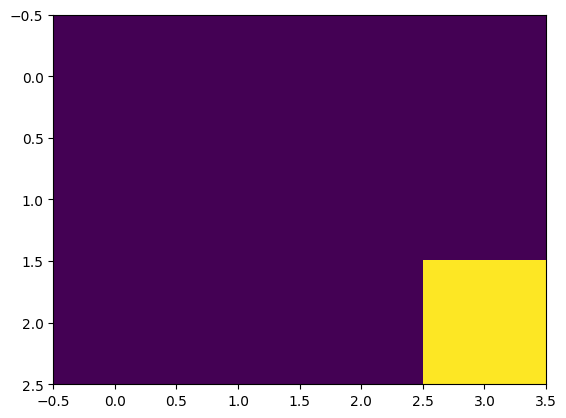

In [7]:
obs, _ = env.reset()
terminated, truncated = False, False

env.render()

# Continue through the episode untill we reach termination state
while not terminated:
  # Agent deciding on what action to choose.
  action = agent.step(obs)
  
  # Mapping action number to action
  if action == 0:
    action_took = 'Down'
  elif action == 1:
    action_took = 'Up'
  elif action == 2:
    action_took = 'Right'
  elif action == 3:
    action_took = 'Left'

  print("Agent opt to take the following action: {0}".format(action_took))
  
  # Environment performing taking an action.
  obs, reward, terminated, truncated, info = env.step(action)
  
  print("New Observation: {0}; Immediate Reward: {1}, Termination Status: {2}, Termination Message: {3}".format(obs.reshape((3,4)), reward, 
                                                                                                                terminated, info['Termination Message']))

  env.render()
  time.sleep(1)

  print('**************')


In [169]:
n_step_agent, n_step_reward_across_episodes, n_step_epsilons_across_episodes = n_step_sarsa_learning_loop(max_timesteps=20,learning_rate=0.06, discount_factor=0.9, 
                                                                        episodes=100, min_epsilon_allowed=0.05, initial_epsilon_value=1,n=2)

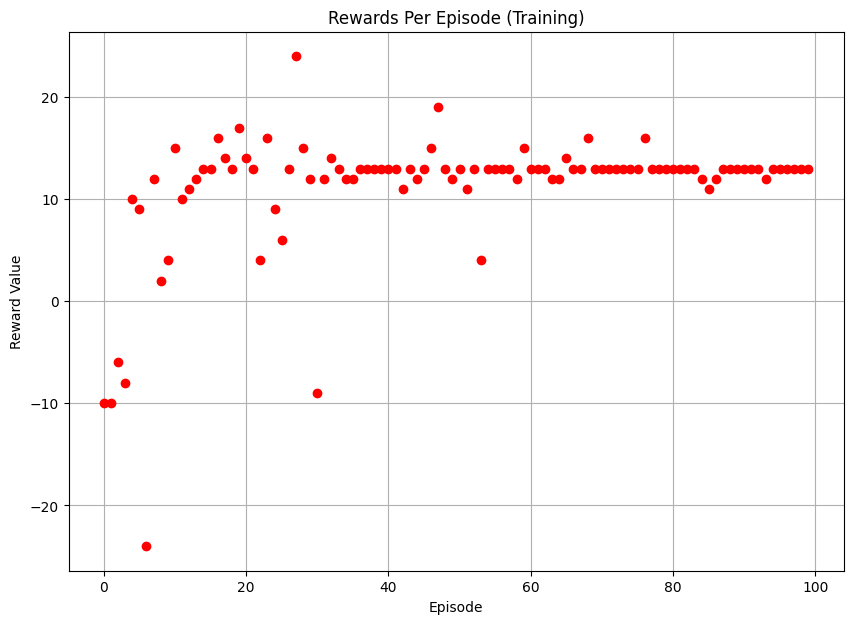

In [170]:
main_plot(n_step_reward_across_episodes)

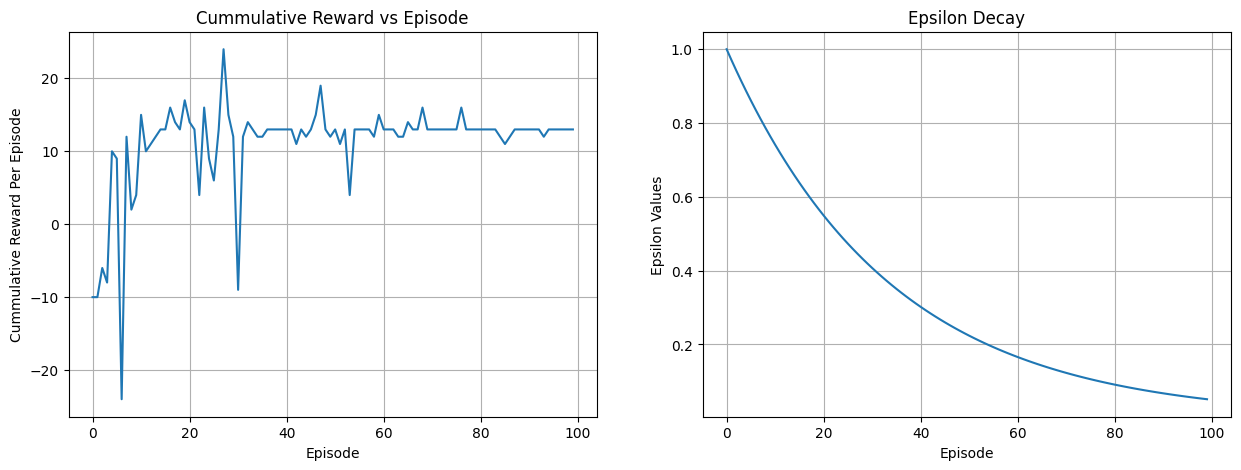

In [171]:
extra_plots(n_step_reward_across_episodes, n_step_epsilons_across_episodes)

Initial Observation: [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
Agent opt to take the following action: Down
New Observation: [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.5]; Immediate Reward: 0, Termination Status: False, Termination Message: Not Terminated
**************
Agent opt to take the following action: Right
New Observation: [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.5]; Immediate Reward: 0, Termination Status: False, Termination Message: Not Terminated
**************
Agent opt to take the following action: Down
New Observation: [0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.5]; Immediate Reward: 0, Termination Status: False, Termination Message: Not Terminated
**************
Agent opt to take the following action: Right
New Observation: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.5]; Immediate Reward: 3, Termination Status: False, Termination Message: Not Terminated
**************
Agent opt to take the following action: Right
New Observation: [0. 0. 0. 0. 0. 

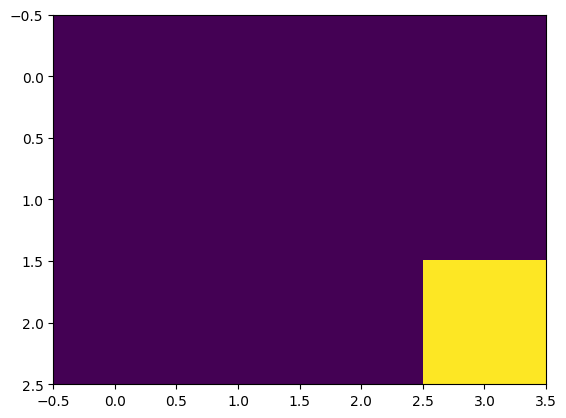

In [172]:
env = GridEnvironment(max_timesteps=20)
verification_loop(env, n_step_agent)

In [173]:
multi_episodes_verification_loop(env, n_step_agent, 10)

For episode 1, the cummulative reward is: 13
For episode 2, the cummulative reward is: 13
For episode 3, the cummulative reward is: 13
For episode 4, the cummulative reward is: 13
For episode 5, the cummulative reward is: 13
For episode 6, the cummulative reward is: 13
For episode 7, the cummulative reward is: 13
For episode 8, the cummulative reward is: 13
For episode 9, the cummulative reward is: 13
For episode 10, the cummulative reward is: 13
